In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from plotBoundary import *
import pylab as pl
%matplotlib inline

In [2]:
train = np.loadtxt('data/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]
X = np.concatenate((np.ones([400,1]), X), axis=1)

In [11]:
w = np.zeros(len(X[0]))
L = 2**-5
step_size = 1e-1
max_epochs = 200

In [12]:
t = 0
for epoch in range(max_epochs):
    for i in range(len(X)):
        t += 1
        step_size = 1/(t*L)
        multiplier = np.array([1.]+[1.-step_size*L for j in range(len(w)-1)])
        w *= multiplier
        if Y[i]*(w.dot(X[i])) < 1:
            w += step_size*Y[i]*X[i]

In [13]:
def predict_linearSVM(x):
    return w[0] + w[1:].dot(x)

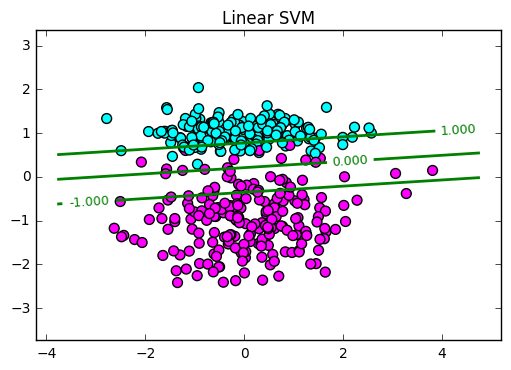

In [14]:
plotDecisionBoundary(X[:,1:], Y, predict_linearSVM, [-1,0,1], title = 'Linear SVM')
pl.show()